In [1]:
import os
import pandas as pd
import numpy as np
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project')
#os.chdir('/home/hsuanyu')
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

# CountVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
df=train.append(test,ignore_index=True)
text=df["comment_text"]

word_vectorizer=CountVectorizer(
    #sublinear_tf=True,
    #strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
# tokenize and build vocab
word_vectorizer.fit(text)


train_features = word_vectorizer.transform(train['comment_text'])
test_features=word_vectorizer.transform(test['comment_text'])
print(train_features.shape)

(8000, 100)


In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in n_estim:
    rf_count = RandomForestClassifier(n_estimators=k, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1)
    scores = cross_val_score(rf_count, train_features.toarray(), np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_count = [1 - x for x in cv_scores]

In [40]:
myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
l = [i for i in n_estim]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of estimators is %d" % optimal_k)
MSE_count_df = pd.DataFrame(MSE_count)
MSE_count_df.to_csv('/Users/yehhsuan-yu/Umich/Stats503/project/MSE_count_rf.csv')

The optimal number of estimators is 23


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=23, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1).fit(train_features.toarray(), np.array(train['toxic']))
predict_tfidf = rf_tfidf.predict(test_features.toarray())
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.7585


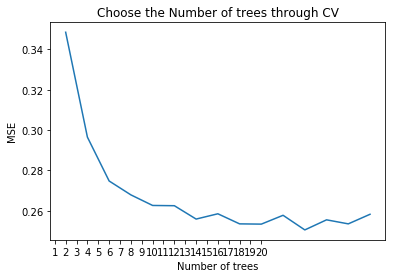

In [42]:
import matplotlib.pyplot as plt
a = plt.figure()
plt.plot(l, MSE_count)
ax = plt.gca()
ax.set_xticks(range(0,20))
ax.set_xticklabels(myList)
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.title('Choose the Number of trees through CV')
plt.show()
a.savefig('rf_mse.eps', format='eps', dpi=1000)

# TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
text=df["comment_text"]

word_vectorizer_tfidf=TfidfVectorizer(
    sublinear_tf=True,
    #strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
word_vectorizer_tfidf.fit(text)

train_features_tfidf = word_vectorizer_tfidf.transform(train['comment_text'])
test_features_tfidf = word_vectorizer_tfidf.transform(test['comment_text'])
print(train_features_tfidf.shape)

(8000, 100)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in n_estim:
    rf_tfidf = RandomForestClassifier(n_estimators=k, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1)
    scores = cross_val_score(rf_tfidf, train_features_tfidf.toarray(), np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_tfidf = [1 - x for x in cv_scores]

In [36]:
myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
l = [i for i in n_estim]
optimal_k = l[MSE_tfidf.index(min(MSE_tfidf))]
print ("The optimal number of estimators is %d" % optimal_k)
MSE_tfidf_df = pd.DataFrame(MSE_tfidf)
MSE_tfidf_df.to_csv('/Users/yehhsuan-yu/Umich/Stats503/project/MSE_tfidf_rf.csv')

The optimal number of estimators is 23


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=23, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1).fit(train_features_tfidf.toarray(), np.array(train['toxic']))
predict_tfidf = rf_tfidf.predict(test_features_tfidf.toarray())
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.7595


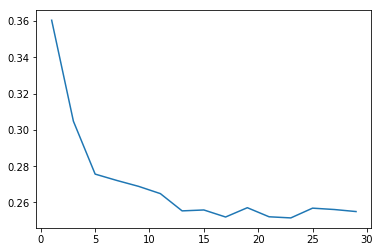

In [38]:
import matplotlib.pyplot as plt
plt.plot(l, MSE_tfidf)
plt.show()